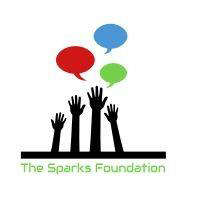

# Task 4 : To Explore Decision Tree Algorithm

**For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.**

**Importing the required libaries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
%matplotlib inline

**Dataset**

In [2]:
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Checking the dimension of the dataset**

In [4]:
iris_data.shape

(150, 6)

**Checking for any null value**

In [5]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Dropping the 'Id' column as it is not needed**

In [6]:
iris_data.drop(['Id'],axis=1,inplace=True)

**Checking all statistics of the data**

In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Visualization of the data**

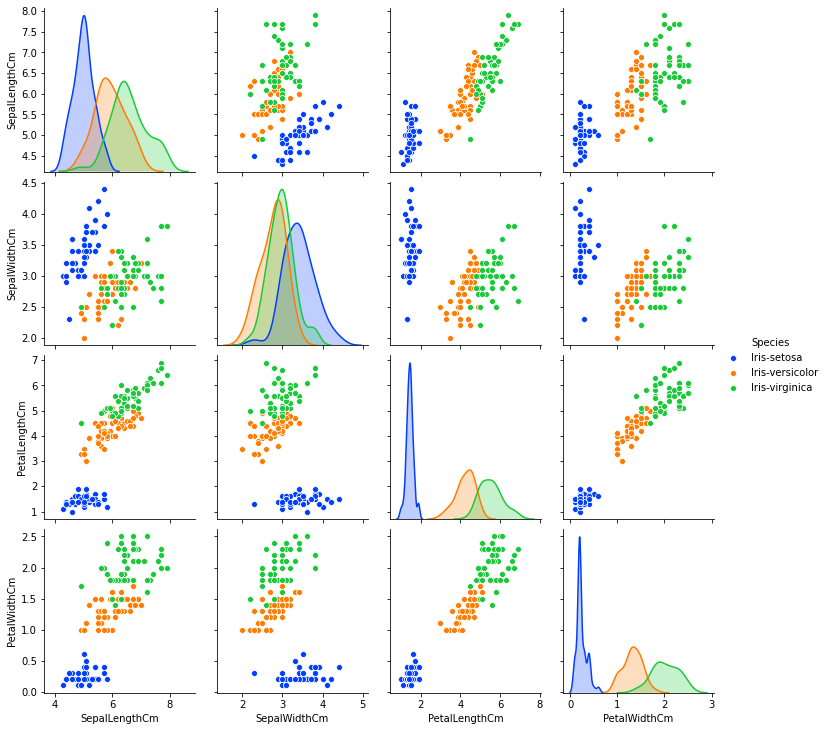

In [25]:
sns.pairplot(data=iris_data,hue='Species',palette='bright')

**Above we have used a pairplot to get a wholeistic view of the data**

**Now, We try gain more information about the data and look into individual features**

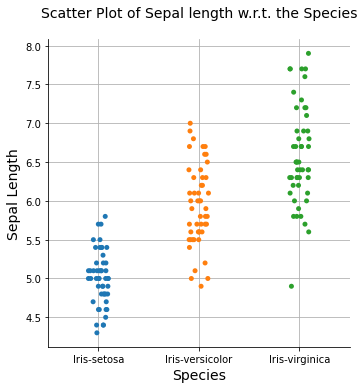

In [26]:
sns.catplot(y='SepalLengthCm',x='Species',data=iris_data,legend=True)
plt.title('Scatter Plot of Sepal length w.r.t. the Species\n ',size=14)
plt.grid(True)
plt.xlabel('Species',size=14)
plt.ylabel('Sepal Length',size=14)
plt.show()

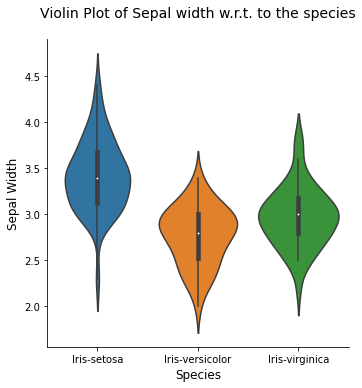

In [27]:
sns.catplot(y='SepalWidthCm',x='Species',data=iris_data,legend=True,kind='violin')
plt.title('Violin Plot of Sepal width w.r.t. to the species\n',size=14)
plt.xlabel('Species',size=12)
plt.ylabel('Sepal Width',size=12)
plt.show()

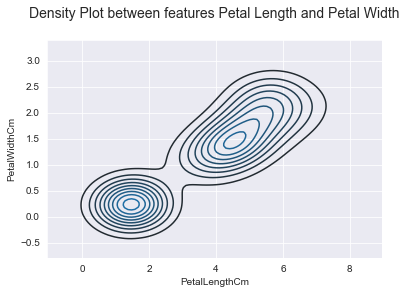

In [28]:
sns.set_style('darkgrid')
sns.kdeplot(iris_data['PetalLengthCm'],iris_data['PetalWidthCm'],)
plt.title('Density Plot between features Petal Length and Petal Width\n',size=14)
plt.show()

**Separating the dependent and the independent feature**

In [10]:
x=iris_data.iloc[:,:-1]
y=iris_data.iloc[:,4]

In [11]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Spliting the data for training and testing the model**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [14]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
69,5.6,2.5,3.9,1.1
135,7.7,3.0,6.1,2.3
56,6.3,3.3,4.7,1.6
80,5.5,2.4,3.8,1.1
123,6.3,2.7,4.9,1.8


In [15]:
y_train.head()

69     Iris-versicolor
135     Iris-virginica
56     Iris-versicolor
80     Iris-versicolor
123     Iris-virginica
Name: Species, dtype: object

# Training the model

**Applying Decision Tree algorithm**

We first see the depth at which the accuracy is highest 

In [16]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

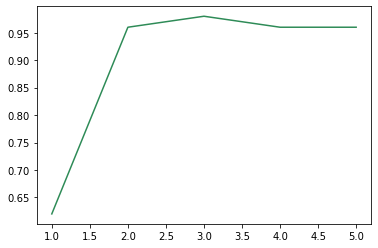

In [17]:
acc_score=[]
for i in range(1,6):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    acc_score.append(model.score(x_test,y_test))
acc_score
depth=[i for i in range(1,6)]
plt.plot(depth,acc_score,c='seagreen')  

 **We choose value 3**

In [19]:
classifier=DecisionTreeClassifier(max_depth=3)

In [20]:
classifier.fit(x_train,y_train)
predict=classifier.predict(x_test)

**Comapring the predicted with the actual values**

In [21]:
df=pd.DataFrame({'Actual Values':y_test,'Predicted Values':predict})
df.head()

,Actual Values,Predicted Values
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


# Evaluation of the Model

In [22]:
cm=confusion_matrix(y_test,predict)
print('Confusion Matrix for Model 1 :\n\n',cm)

Confusion Matrix for Model 1 :

 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


In [23]:
acc=accuracy_score(y_test,predict)

print('The Accuracy of the model is :{}\n'.format(acc))

The Accuracy of the model is :0.98



# Visualizing the Decision Tree

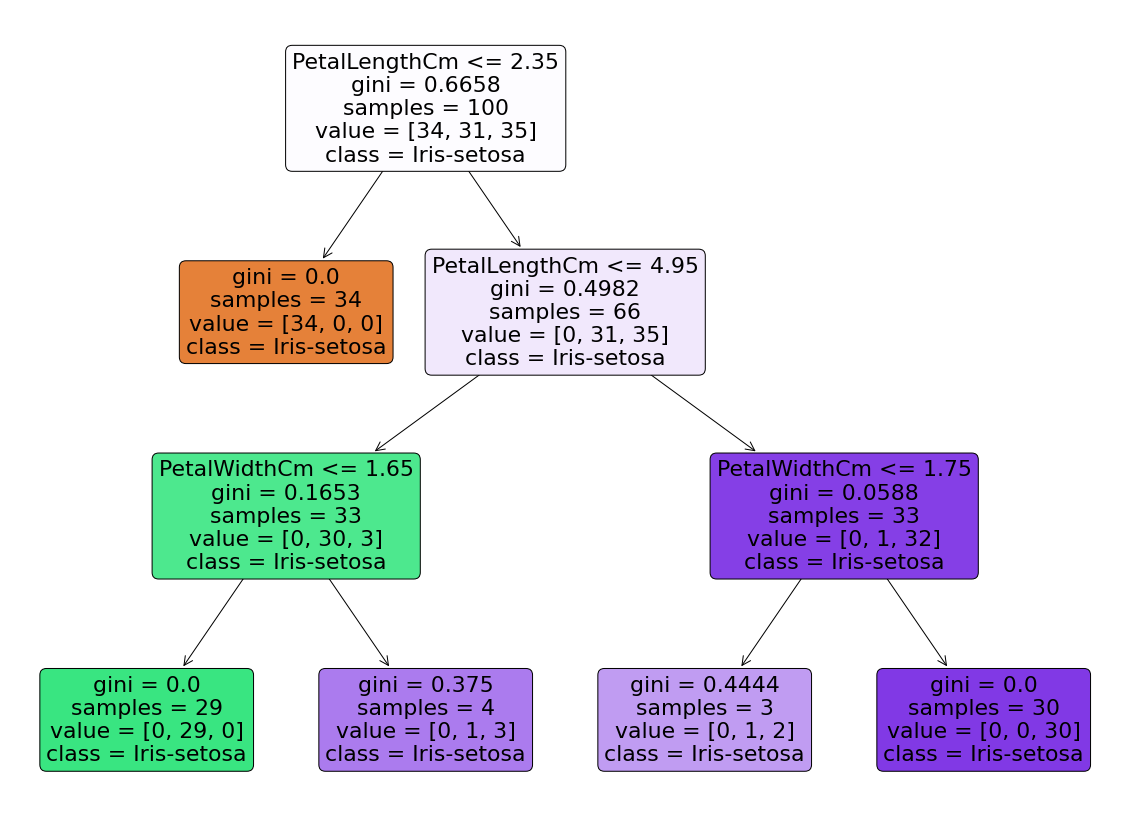

In [24]:
col = y.tolist()
plt.figure(figsize=(20,15))
tree_1=plot_tree(classifier, feature_names =x.columns ,class_names=col, precision = 4, label = "all", 
                      filled=True, rounded=True)
plt.savefig('Tree Classifier')

# Made by Bishal Paul